In [7]:
import nltk
import pandas as pd
import re
import string
from nltk.stem import WordNetLemmatizer 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
dataset = pd.read_csv('/content/sample_data/Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [4]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
len(dataset)

1000

In [8]:
stopwords = nltk.corpus.stopwords.words('english')

In [9]:
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

In [11]:
dataset.dtypes

Review    object
Liked      int64
dtype: object

In [12]:
import string

In [13]:
positive_review=''
negative_review=''


In [16]:
for i in range(0,len(dataset)):
    if dataset['Liked'][i]==1:
        positive_review=positive_review+' '+dataset['Review'][i]
    if dataset['Liked'][i]==0:
        negative_review=negative_review+' '+dataset['Review'][i]

In [17]:
positive_review

' Wow... Loved this place. Stopped by during the late May bank holiday off Rick Steve recommendation and loved it. The selection on the menu was great and so were the prices. The fries were great too. A great touch. Service was very prompt. I tried the Cape Cod ravoli, chicken, with cranberry...mmmm! Highly recommended. The food, amazing. Service is also cute. I could care less... The interior is just beautiful. So they performed. That\'s right....the red velvet cake.....ohhh this stuff is so good. This hole in the wall has great Mexican street tacos, and friendly staff. Also there are combos like a burger, fries, and beer for 23 which is a decent deal. I found this place by accident and I could not be happier. Overall, I like this place a lot. The only redeeming quality of the restaurant was that it was very inexpensive. Ample portions and good prices. My first visit to Hiro was a delight! The shrimp tender and moist. On a positive note, our server was very attentive and provided grea

In [18]:
positive_review_nopunct = ''.join([char for char in positive_review if char not in string.punctuation])

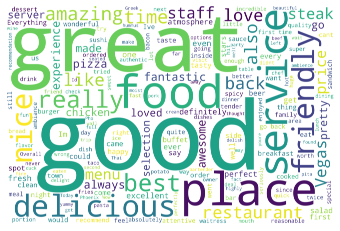

In [23]:
wordcloud1= WordCloud(stopwords=stopwords,background_color='white',width=6000,height=4000).generate(positive_review_nopunct)
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [24]:
dataset.Liked.value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize,TreebankWordTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()
tokenize = TreebankWordTokenizer()

In [63]:
def preprocessed(dataset):
    for i in range(dataset.shape[0]):
        dataset['Review'][i]=tokenize.tokenize(str(dataset['Review'][i]))
        dataset['Review'][i]=([token.lower() for token in dataset['Review'][i] if token not in stopwords])
        dataset['Review'][i] = ([token for token in dataset.Review[i] if token not in string.punctuation])
        dataset['Review'][i] = " ".join([lemma.lemmatize(token) for token in dataset['Review'][i]]).strip()
    return dataset

In [49]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
def preprocessed(dataset):
    for i in range(dataset.shape[0]):
        dataset['Review'][i]=tokenize.tokenize(str(dataset['Review'][i]))
        dataset['Review'][i]=([token.lower() for token in dataset['Review'][i] if token not in stopwords])

In [64]:
preprocessed(dataset)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,Review,Liked
0,wow ... loved place,1
1,crust good,0
2,not tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,the selection menu great price,1
...,...,...
995,i think food flavor texture lacking,0
996,appetite instantly gone,0
997,overall i impressed would go back,0
998,the whole experience underwhelming i think 'll...,0


In [67]:
dataset.head()

,Review,Liked
0,wow loved place,1
1,crust good,0
2,not tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,the selection menu great price,1


In [66]:
for i in range(dataset.shape[0]):
        dataset['Review'][i]=dataset['Review'][i].replace('...','')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
from sklearn.model_selection import train_test_split
train,validation= train_test_split(dataset,test_size=0.3,random_state=2)

In [91]:
train.shape

(700, 2)

In [92]:
train.reset_index(drop=True,inplace=True)
validation.reset_index(drop=True,inplace=True)

In [93]:
train.head()

,Review,Liked
0,in summary largely disappointing dining experi...,0
1,this greedy corporation never see another dime,0
2,bland not liking place number reason i n't wa...,0
3,after rave review i could n't wait eat disap...,0
4,avoid cost,0


In [94]:
cv = CountVectorizer(max_features=2000)
tfidf = TfidfVectorizer()

In [95]:
tfidf.fit(train['Review'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [98]:
train_tfidf=tfidf.transform(train['Review'])

In [100]:
valid_tfidf= tfidf.transform(validation['Review'])

Multinomial NB

In [101]:
mulNB= MultinomialNB()
mulNB.fit(train_tfidf,train['Liked'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [102]:
predictions=pd.DataFrame(list(zip(validation['Liked'],mulNB.predict(valid_tfidf))),columns=['real','predicted'])

In [104]:
from sklearn.metrics import confusion_matrix

In [105]:
confusion_matrix(predictions['real'],predictions['predicted'])

array([[111,  40],
       [ 24, 125]])

In [84]:
from sklearn.metrics import accuracy_score

In [111]:
accuracy_score(predictions['real'],predictions['predicted'])*100

78.66666666666666

In [107]:
from sklearn.metrics import precision_score

In [112]:
precision_score(predictions['real'],predictions['predicted'])*100

75.75757575757575

Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
clf = LogisticRegression(C=1.5)

In [116]:
clf.fit(train_tfidf,train['Liked'])

LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
predictions_lr=pd.DataFrame(list(zip(validation['Liked'],clf.predict(valid_tfidf))),columns=['real','predicted'])

In [118]:
accuracy_score(predictions_lr['real'],predictions_lr['predicted'])*100

77.66666666666666

In [119]:
confusion_matrix(predictions_lr['real'],predictions_lr['predicted'])

array([[122,  29],
       [ 38, 111]])

In [120]:
#Mul NB giving 79% accuracy where Logisitic regression gave 78% accuracy using tfidfvectorizer